## *Project on Polynomial Regression using insurance data*

- Do visualization and analysis to understand the dataset (follow kaggle code
for inspiration)
- Apply polynomial regression to predict

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('G:/Data science Course/class 8/class 8/insurance.csv') # I have read the csv file from my local machine
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# cheching if there is any missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###### The dataset does not have any missing values

In [4]:
df1 = df.copy()

### Data visualization and analysis

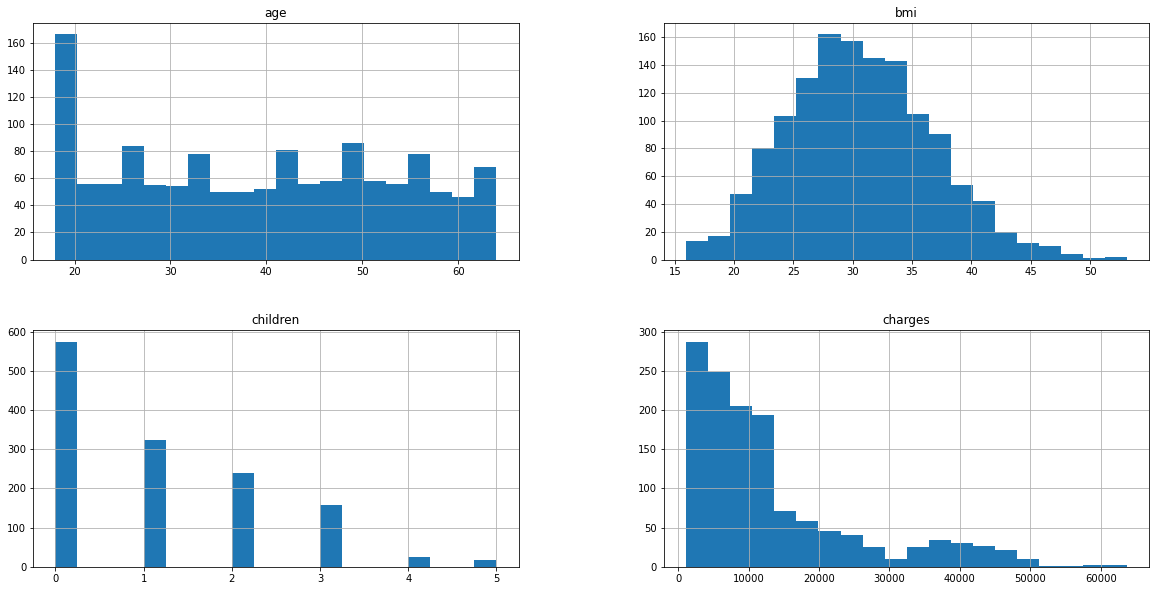

In [5]:
# histogram for each numerical type attributes
df1.hist(bins=20,figsize=(20,10));

###### From this four histogram we can come up with these decisions. First, Insurance charges increases with the age. Second, 'bmi' histogram is almost normally distributed. Third, people who have less children likely to have more insurance charges. Finally, 'charges' histogram is right skewed and its not normally distributed

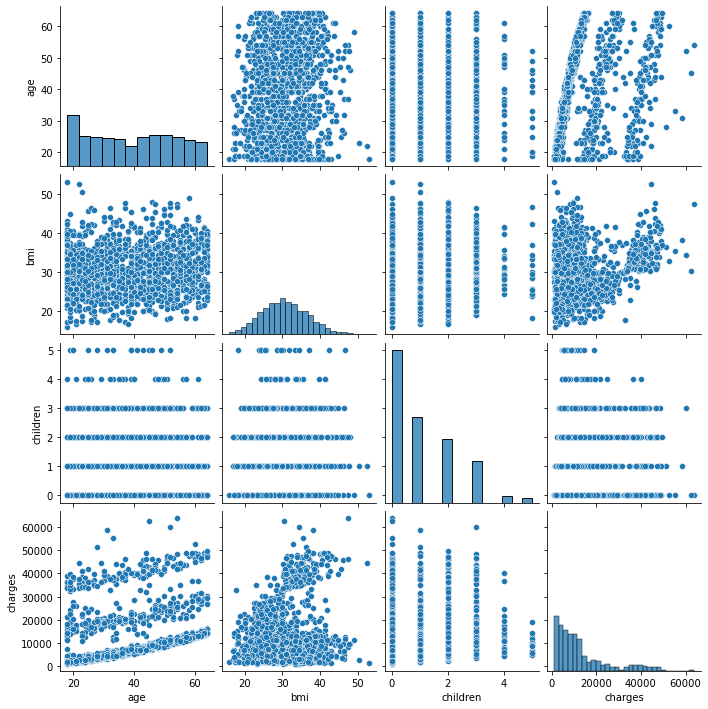

In [6]:
# To understand pairwise relationships in this dataset pairplot is used.
sns.pairplot(df1,palette='magma')

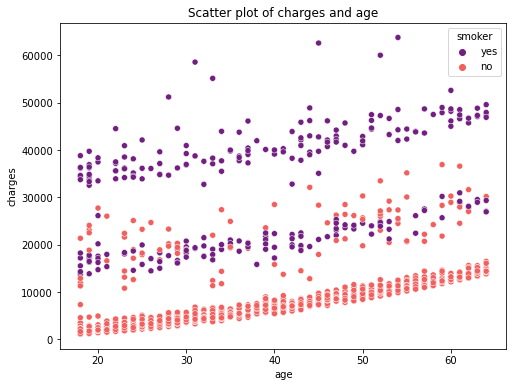

In [7]:
# scatterplot to understand the relation between age and charges
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x='age',y='charges',data=df1,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and age');

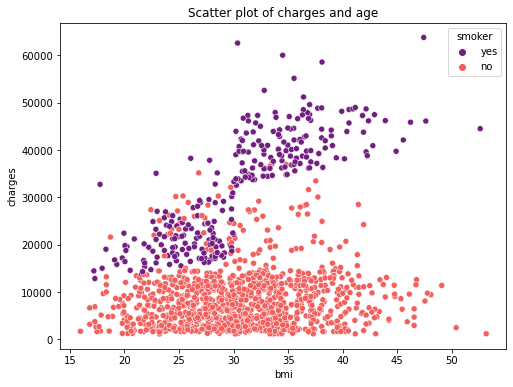

In [8]:
# scatterplot to understand the relation between bmi and charges
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df1,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and age');

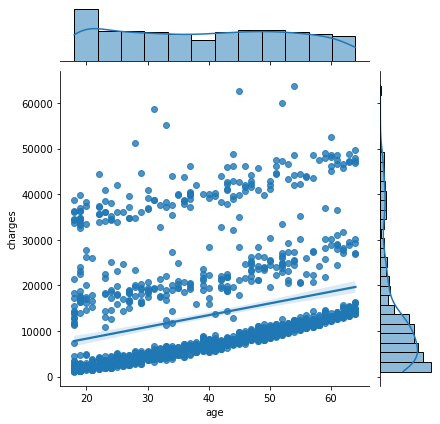

In [9]:
# jointplot for age vs charges
sns.jointplot(x="age", y="charges", data=df1, kind="reg",palette='magma')
plt.show()

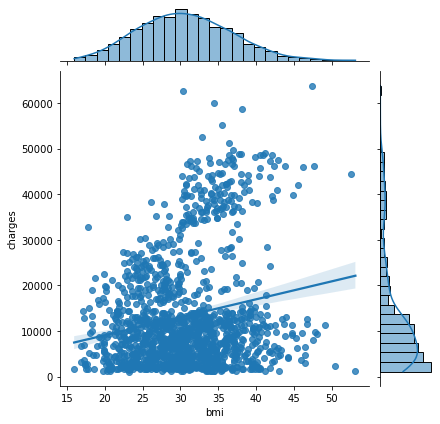

In [10]:
# jointplot for bmi vs charges
sns.jointplot(x="bmi", y="charges", data=df1, kind="reg",palette='magma')
plt.show()

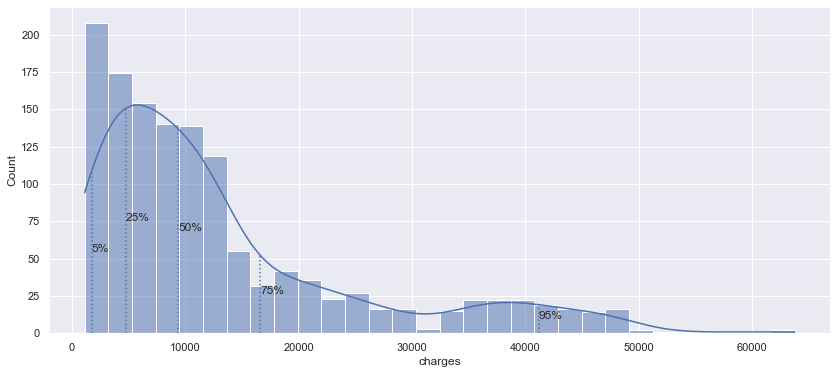

In [11]:
# Histogram of charges using kdeplot to show the continous curve. 
# How measure of dispersion works is also shown from 5 quantile to 95.

sns.set(rc = {'figure.figsize':(14, 6)})

ax = sns.histplot(x=df1['charges'], kde=True)

quant_5, quant_25, quant_50, quant_75, quant_95 = df1['charges'].quantile(0.05), df1['charges'].quantile(0.25), df1['charges'].quantile(0.5), df1['charges'].quantile(0.75), df1['charges'].quantile(0.95)
quant_dict = {'5%': quant_5, '25%': quant_25, '50%': quant_50, '75%': quant_75, '95%': quant_95}

kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

for key, value in quant_dict.items():
    height = np.interp(value, xs, ys)
    ax.vlines(value, 0, height,  ls=':')
    ax.text(value , height * 0.5, key, rotation=0)
    
plt.show()

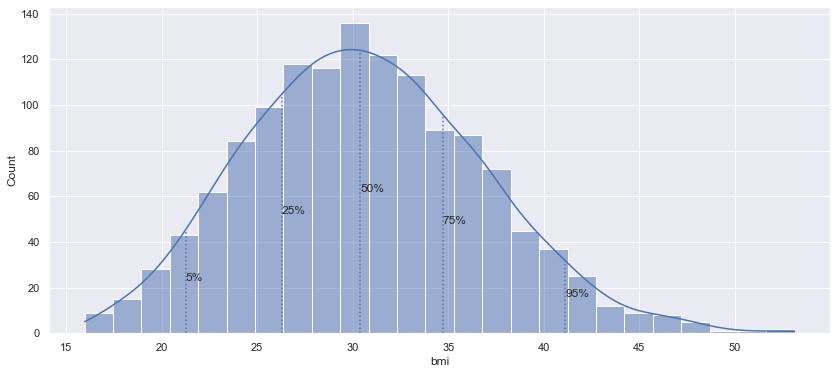

In [12]:
# Histogram of bmi using kdeplot to show the continous curve. 
# How measure of dispersion works is also shown from 5 quantile to 95.

sns.set(rc = {'figure.figsize':(14, 6)})

ax = sns.histplot(x=df1['bmi'], kde=True)

quant_5, quant_25, quant_50, quant_75, quant_95 = df1['bmi'].quantile(0.05), df1['bmi'].quantile(0.25), df1['bmi'].quantile(0.5), df1['bmi'].quantile(0.75), df1['bmi'].quantile(0.95)
quant_dict = {'5%': quant_5, '25%': quant_25, '50%': quant_50, '75%': quant_75, '95%': quant_95}

kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

for key, value in quant_dict.items():
    height = np.interp(value, xs, ys)
    ax.vlines(value, 0, height,  ls=':')
    ax.text(value , height * 0.5, key, rotation=0)
    
plt.show()

###### Barplot for the categorical features(smoker,sex,region) vs charges

<AxesSubplot:xlabel='smoker', ylabel='charges'>

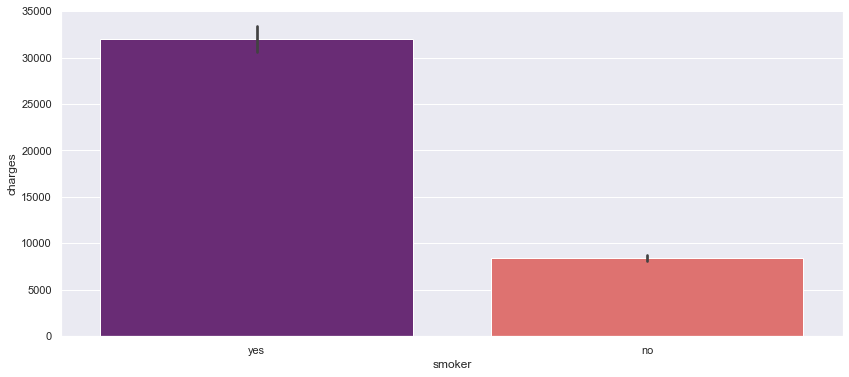

In [13]:
sns.barplot(data=df,x='smoker',y='charges',palette='magma')

###### smoker has higher insurance charges than a non-smoker

<AxesSubplot:xlabel='sex', ylabel='charges'>

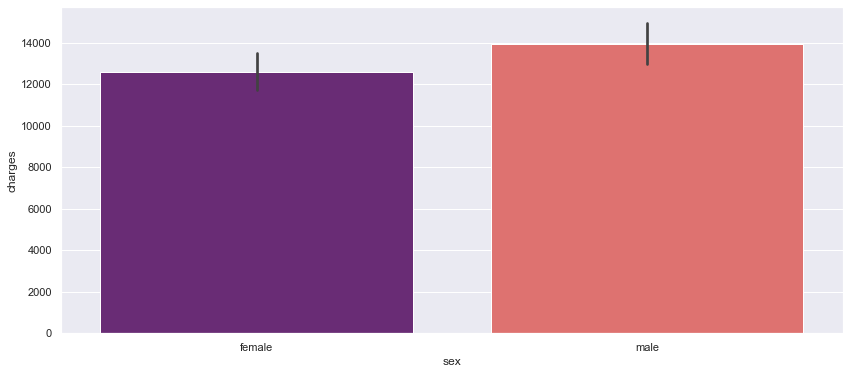

In [14]:
sns.barplot(data=df,x='sex',y='charges',palette='magma')

###### Male has a bit higher insurance charges than female

<AxesSubplot:xlabel='region', ylabel='charges'>

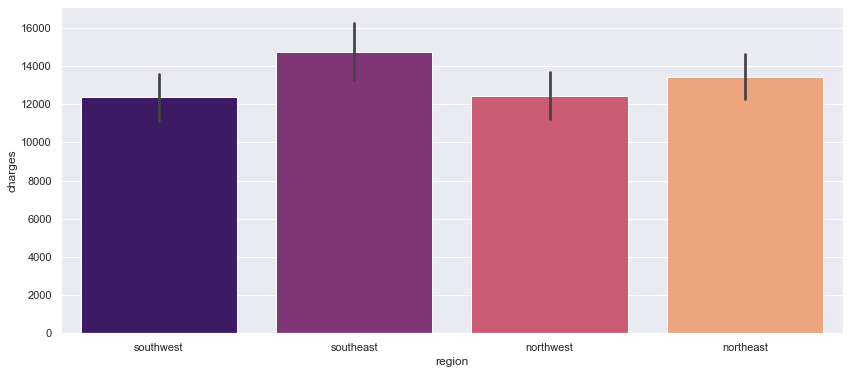

In [15]:
sns.barplot(data=df,x='region',y='charges',palette='magma')

###### Southeast region has more insurance than other regions

### Feature engineering and prediction

In [16]:
# We will use label encoder to label the categorical features.
le=LabelEncoder()
df1['sex']= le.fit_transform(df['sex'])
df1['region']= le.fit_transform(df['region'])
df1['smoker']= le.fit_transform(df['smoker'])

In [17]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [18]:
# Now we will see the correlation between the features after lable encoding.
df1.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


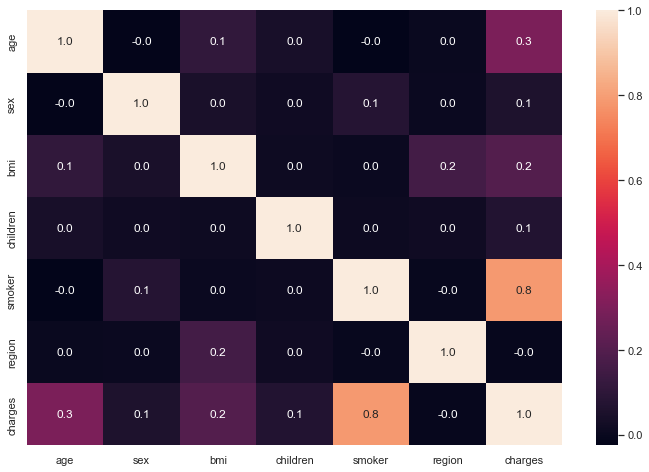

In [19]:
# Showing heatmap of the correlation for better understing.
f, ax = plt.subplots(figsize=(12, 8))
corr = df1.corr()
sns.heatmap(corr, annot=True, fmt=".1f")
plt.show()

###### This is a multivariate regression problem as we are working with 6 feature columns and 1 target column

In [20]:
X = df1.drop('charges', axis = 1)
y = df1['charges']

In [21]:
# Standardizaton
scaler= StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

###### Polynomial regression is higher degree linear regression. The degree starts from 2 for polynomial regression. First we take a look at 1 degree polynomial regression which is linear regression.

In [23]:
lin_reg= LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [24]:
lin_reg.coef_ , lin_reg.intercept_

(array([3674.45669096,   54.82059679, 2100.31346607,  511.38394673,
        9532.01310428, -360.56881386]),
 13320.463427892302)

In [25]:
# prediction for linear regression
y_pred = lin_reg.predict(X_test)

In [26]:
# values of r2 score, mean squared error and root mean squared error
print(f"r2 score: {metrics.r2_score(y_test,y_pred)}")
print(f"mean squared error: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

r2 score: 0.7694415927057693
mean squared error: 33805466.898688614
root mean squared error: 5814.246890069995


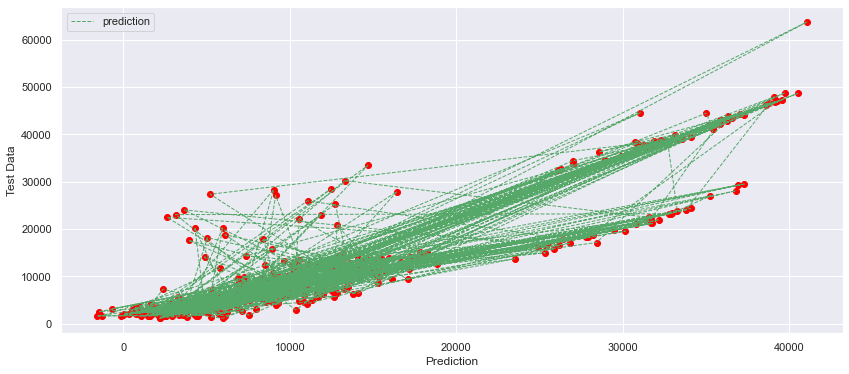

In [27]:
# plotting for multivariate linear regression 
plt.scatter(x = y_pred,y = y_test, color='red')
plt.plot(y_pred,y_test, "g--",linewidth=1,label='prediction')
plt.xlabel('Prediction')
plt.ylabel('Test Data')
plt.legend()
plt.show()

###### Now for 2 degree polynomial regression

In [28]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [29]:
# analyze the input,ouput and powers of the polynomial 
print("Input",poly_reg.n_input_features_)
print("Ouput",poly_reg.n_output_features_)
print("Powers\n",poly_reg.powers_)

Input 6
Ouput 28
Powers
 [[0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [2 0 0 0 0 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [1 0 0 1 0 0]
 [1 0 0 0 1 0]
 [1 0 0 0 0 1]
 [0 2 0 0 0 0]
 [0 1 1 0 0 0]
 [0 1 0 1 0 0]
 [0 1 0 0 1 0]
 [0 1 0 0 0 1]
 [0 0 2 0 0 0]
 [0 0 1 1 0 0]
 [0 0 1 0 1 0]
 [0 0 1 0 0 1]
 [0 0 0 2 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 0 1]
 [0 0 0 0 2 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 2]]


G:\Anaconda_installed_files\envs\tensorflow_env\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


In [30]:
X_poly.shape

(1338, 28)

In [31]:
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)

In [32]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)

LinearRegression()

In [33]:
y_pred_poly = pol_reg.predict(X_poly_test)
y_test_poly = y_test

In [34]:
print(pol_reg.coef_)
print(pol_reg.intercept_)

[-1.31974150e+10  3.67673952e+03 -8.82656587e+11  2.03273400e+03
  8.65101190e+02 -6.92885031e+12 -4.36006500e+02  7.87974837e+02
  1.15407250e+02  1.48266371e+02 -2.20603109e+01 -6.69684704e+00
  3.20887132e+02 -4.21760665e+13  1.17603829e+02 -1.94523753e+02
  9.77279949e+01  1.25559094e+02 -2.97232820e+02  1.50894083e+02
  3.53929501e+03 -2.79136755e+02 -8.76270230e+01 -2.09701135e+02
 -2.77896648e+02  4.73565639e+12  1.71455921e+02  1.60642622e+02]
37453607551198.22


In [35]:
# values of r2 score, mean squared error and root mean squared error
print(f"r2 score: {metrics.r2_score(y_test_poly,y_pred_poly)}")
print(f"mean squared error: {metrics.mean_squared_error(y_test_poly, y_pred_poly)}")
print(f"root mean squared error: {np.sqrt(metrics.mean_squared_error(y_test_poly, y_pred_poly))}")

r2 score: 0.8637579958823266
mean squared error: 19976389.559862535
root mean squared error: 4469.495448018997


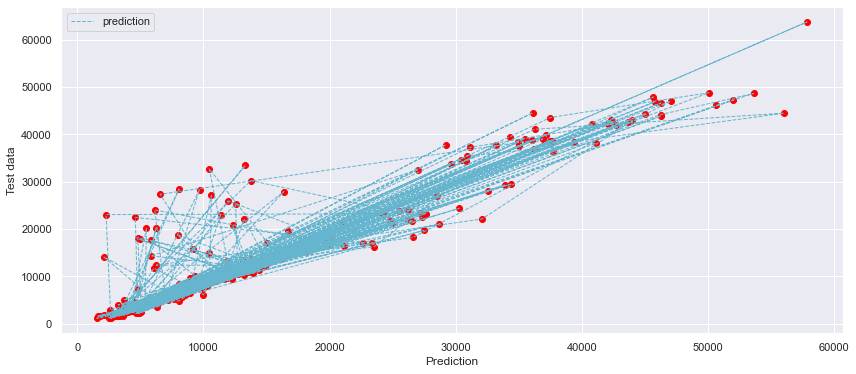

In [36]:
# plotting for multivariate linear regression
plt.scatter(x = y_pred_poly,y = y_test_poly, color='red')
plt.plot(y_pred_poly,y_test_poly, "c--",linewidth=1,label='prediction')
plt.xlabel('Prediction')
plt.ylabel('Test data')
plt.legend()
plt.show()

###### Now we loop through for 3 to 6 degree to understand which degree gives us better prediction

r2 score: 0.8548460019470836
mean squared error: 21283104.50257419
root mean squared error: 4613.361518738174


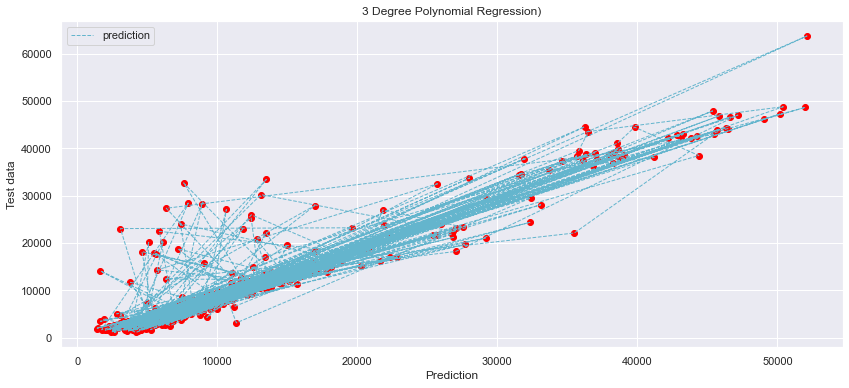

r2 score: 0.7694417904773675
mean squared error: 33805437.90056491
root mean squared error: 5814.2443963566675


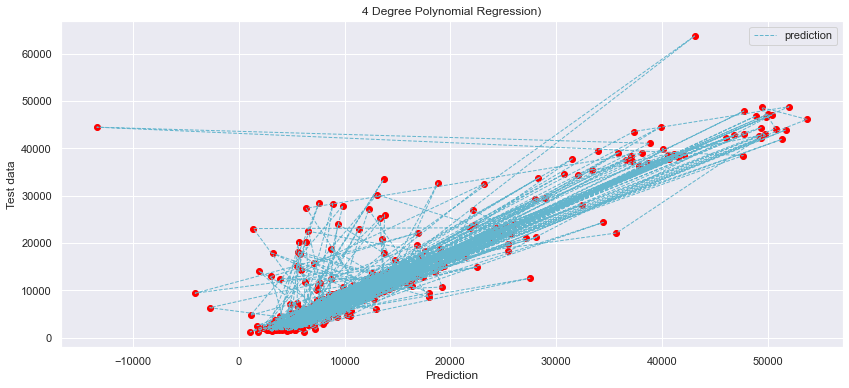

r2 score: 0.5171062454565707
mean squared error: 70803962.54632632
root mean squared error: 8414.509049631257


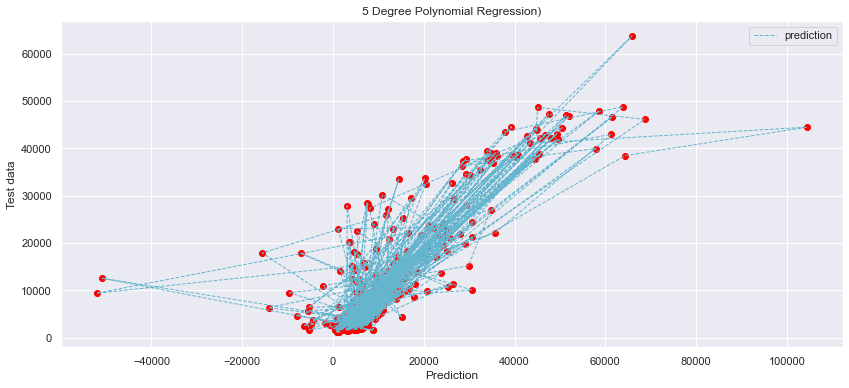

In [37]:
for i in range(3, 6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_poly_train = poly_reg.fit_transform(X_train)
    X_poly_test = poly_reg.fit_transform(X_test)
    
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly_train, y_train)
    
    
    y_pred_poly = pol_reg.predict(X_poly_test)
    y_test_poly = y_test
    
    print(f"r2 score: {metrics.r2_score(y_test_poly,y_pred_poly)}")
    print(f"mean squared error: {metrics.mean_squared_error(y_test_poly, y_pred_poly)}")
    print(f"root mean squared error: {np.sqrt(metrics.mean_squared_error(y_test_poly, y_pred_poly))}")
    

    plt.scatter(x = y_pred_poly,y = y_test_poly, color='red')
    plt.plot(y_pred_poly,y_test_poly, "c--",linewidth=1,label='prediction')

    plt.title(f'{i} Degree Polynomial Regression)')
    plt.xlabel('Prediction')
    plt.ylabel('Test data')
    plt.legend()
    plt.show()
    


###### As we can see we get better r2 score at degree 2 and error is also lesser in degree 2. So, It can be said that degree 2 is our go to polynomial regression model for predicting medical insurance charges according to this dataset.